In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
Integ = pd.read_csv('Integrated_Tax_System_Public_Extract.csv')

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (60,81,91,101,111,131,141,161,171,181,191,200,202,203) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Integ.head()

In [4]:
Integ.columns

Index(['INTERNALID', 'SSL', 'SQUARE', 'SUFFIX', 'LOT', 'ARN', 'ASRNAME',
       'PROPTYPE', 'TRIGROUP', 'USECODE',
       ...
       'SEWSTOTALDUE', 'SEWSCOLLECTED', 'SEWSBALANCE', 'PACETOTALDUE',
       'PACECOLLECTED', 'PACEBALANCE', 'SWWSADTOTALDUE', 'SWWSADCOLLECTED',
       'SWWSADBALANCE', 'OBJECTID'],
      dtype='object', length=218)

In [10]:
pd.set_option('display.max_rows',300)

In [89]:
perc_null = Integ.isna().sum() / len(Integ) * 100
perc_null

INTERNALID           0.000000
SSL                  0.007047
SQUARE               0.007047
SUFFIX              96.199166
LOT                  0.007047
ARN                  0.601368
ASRNAME              9.107438
PROPTYPE             0.500827
TRIGROUP           100.000000
USECODE              0.500827
LANDAREA             0.000000
PRMS_WARD            0.007047
PREMISEADD           0.007047
NBHD                 0.007047
NBHDNAME             0.007047
SUBNBHD             22.568688
UNITNUMBER          62.506577
OWNERNAME            0.150812
CAREOFNAME          93.837856
ADDRESS1             1.393952
ADDRESS2           100.000000
CITYSTZIP            1.393952
OLDLAND              0.000000
OLDIMPR              0.000000
OLDTOTAL             0.000000
NEWLAND              0.000000
NEWIMPR              0.000000
NEWTOTAL             0.000000
PHASELAND            0.000000
PHASEBUILD           0.000000
PARTPART             0.000000
VACLNDUSE           99.509509
LOWNUMBER            4.817522
STREETNAME

In [13]:
type(perc_null)

pandas.core.series.Series

In [90]:
Integ.drop(list(perc_null[perc_null > 90].index),axis=1,inplace=True)

In [91]:
perc_zero = (Integ == 0).sum() / len(Integ) * 100
Integ.drop(list(perc_zero[perc_zero > 90].index),axis=1,inplace=True)

In [32]:
pd.set_option('display.max_columns',100)
Integ.head()

,INTERNALID,SSL,SQUARE,LOT,ARN,ASRNAME,PROPTYPE,USECODE,LANDAREA,PRMS_WARD,PREMISEADD,NBHD,NBHDNAME,SUBNBHD,UNITNUMBER,OWNERNAME,ADDRESS1,CITYSTZIP,OLDLAND,OLDIMPR,OLDTOTAL,NEWLAND,NEWIMPR,NEWTOTAL,PHASELAND,PHASEBUILD,PARTPART,LOWNUMBER,STREETNAME,QDRNTNAME,DELCODE,HSTDCODE,CLASSTYPE,TAXRATE,SALEPRICE,SALEDATE,INST_NO,ACCEPTCODE,SALETYPE,DEEDDATE,MORTGAGECO,ASSESSMENT,ANNUALTAX,DUEDATE1,AMTDUE1,DUEDATE2,AMTDUE2,DUEDATE3,AMTDUE3,TOTDUEAMT,TOTCOLAMT,TOTBALAMT,EXTRACTDAT,CAPCURR,CAPPROP,CY1YEAR,CY1TAX,CY1PEN,CY1INT,CY1TOTDUE,CY1COLL,CY1CR,CY2YEAR,CY2TAX,CY2PEN,CY2INT,CY2TOTDUE,CY2COLL,PY1YEAR,PY1TAX,PY1PEN,PY1INT,PY1TOTDUE,PY1COLL,PY2YEAR,PY2TAX,PY2PEN,PY2INT,PY2TOTDUE,PY2COLL,PY3YEAR,PY3TAX,PY3PEN,PY3INT,PY3TOTDUE,PY3COLL,PY4YEAR,PY5YEAR,PY6YEAR,PY7YEAR,PY8YEAR,PY9YEAR,PY10YEAR,OWNNAME2,OBJECTID
0,668949,PIPAR3000184,PIPA,184.0,449.0,NaN,Special Purpose (Miscellaneous,89.0,12919556,3.0,CANAL RD NW WASHINGTON DC 20007,41.0,Palisades,D,NaN,NaN,3055 PROSPERITY AVE,FAIRFAX VA 22031-2216,0,67260,67260,0,62550,62550,0,67260,N,NaN,CANAL RD,NW,N,NaN,NaN,1.65,0,NaN,NaN,NaN,NaN,NaN,NaN,67260,1109.80,9162021.0,618.71,10162021.0,627.03,11162021.0,635.35,4855.30,4855.30,0.0,2021/10/08 00:00:00+00,67260,62550,2021,554.90,0.00,0.00,554.90,554.90,0.00,2021,554.90,0.0,0.0,554.90,554.90,2020,1109.78,0.00,0.00,1109.78,1109.78,2019,1109.78,55.49,33.29,1198.56,1198.56,2018,1109.78,110.98,216.40,1437.16,1437.16,2017,2016,2015,2014,2013,2012,2011,NaN,1
1,668949,PIPAR6400172,PIPA,172.0,384.0,Paul Gudelski,Vacant-True,191.0,2097414,4.0,NW WASHINGTON DC 00000,60.0,North Rock Creek Park,NaN,NaN,NaN,3055 PROSPERITY AVE,FAIRFAX VA 22031-2216,0,170170,170170,0,170170,170170,0,170170,N,NaN,NW,NW,N,NaN,2.0,1.65,0,NaN,NaN,NaN,NaN,NaN,NaN,170170,2807.82,NaN,0.00,NaN,0.00,NaN,0.00,11231.22,11231.22,0.0,2021/10/08 00:00:00+00,170170,170170,2021,1403.91,0.00,0.00,1403.91,1403.91,1403.91,2021,1403.91,0.0,0.0,1403.91,1403.91,2020,2807.80,0.00,0.00,2807.80,2807.80,2019,2807.80,0.00,0.00,2807.80,2807.80,2018,2807.80,0.00,0.00,2807.80,2807.80,2017,2016,2015,2014,2013,2012,2011,NaN,2
2,672394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,752 WATER ST SW,WASHINGTON DC 20024-2424,0,0,0,0,0,0,0,0,N,NaN,NaN,NaN,N,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,0,1994.86,NaN,0.00,NaN,0.00,NaN,0.00,6239.22,6239.22,0.0,2021/10/08 00:00:00+00,0,0,2021,997.43,99.74,29.92,1127.09,1127.09,0.00,2021,997.43,0.0,0.0,997.43,997.43,2020,1994.84,0.00,0.00,1994.84,1994.84,2019,1994.84,0.00,0.00,1994.84,1994.84,2018,1994.84,-897.68,-972.14,125.02,125.02,2017,2016,2015,2014,2013,2012,2011,NaN,3
3,656297,PI0002570034,PI00,34.0,384.0,Paul Gudelski,Vacant-True,191.0,46161,2.0,1300 E ST NW WASHINGTON DC 20004,72.0,Mall,NaN,NaN,NaN,1300 PENNSYLVANIA AVE NW,WASHINGTON DC 20004-3002,0,39550,39550,0,39550,39550,0,39550,N,1300.0,E ST,NW,N,NaN,2.0,1.65,0,NaN,NaN,NaN,NaN,NaN,NaN,39550,652.58,9162021.0,363.81,10162021.0,368.70,11162021.0,373.59,2672.30,2672.30,0.0,2021/10/08 00:00:00+00,39550,39550,2021,326.29,0.00,0.00,326.29,326.29,0.00,2021,326.29,0.0,0.0,326.29,652.58,2020,652.58,32.63,29.35,714.56,714.56,2019,652.58,0.00,0.00,652.58,652.58,2018,652.58,0.00,0.00,652.58,652.58,2017,2016,2015,2014,2013,2012,2011,NaN,4
4,657169,PI0S58680417,PI0S,417.0,406.0,Javier Marquez,Recreational,87.0,139006,8.0,1100 OAK DRIVE SE WASHINGTON DC 20032,67.0,St. Elizabeth's Hospital,NaN,NaN,NaN,801 MOUNT VERNON PL NW,WASHINGTON DC 20001-3614,10715810,0,10715810,10715810,0,10715810,10715810,0,N,1100.0,OAK DR,SE,N,NaN,2.0,1.89,0,NaN,NaN,NaN,NaN,NaN,NaN,10715810,202528.82,9162021.0,120960.35,10012021.0,121074.27,10162021.0,122593.24,650623.81,650623.81,0.0,2021/10/08 00:00:00+00,10715810,10715810,2021,101264.41,8607.47,0.00,109871.88,109871.88,6075.88,2021,101264.41,0.0,0.0,101264.41,101264.41,2020,202528.82,17214.94,0.00,219743.76,219743.76,2019,202528.82,17214.94,0.00,219743.76,219743.76,2018,0.00,0.00,0.00,0.00,0.00,2017,2016,2015,2014,2013,2012,2011,NaN,5


In [92]:
Integ = Integ[['INTERNALID','SSL','SQUARE','PROPTYPE','LANDAREA','PRMS_WARD','PREMISEADD','NBHDNAME','TAXRATE','SALEPRICE','SALEDATE','ASSESSMENT','ANNUALTAX',\
 'PY1YEAR','PY1TAX','PY1TOTDUE','PY2YEAR','PY2TAX','PY2TOTDUE']].copy()

In [37]:
Integ.head()

,INTERNALID,SSL,SQUARE,PROPTYPE,LANDAREA,PRMS_WARD,PREMISEADD,NBHDNAME,TAXRATE,SALEPRICE,SALEDATE,ASSESSMENT,ANNUALTAX,PY1YEAR,PY1TAX,PY1TOTDUE,PY2YEAR,PY2TAX,PY2TOTDUE
0,668949,PIPAR3000184,PIPA,Special Purpose (Miscellaneous,12919556,3.0,CANAL RD NW WASHINGTON DC 20007,Palisades,1.65,0,NaN,67260,1109.80,2020,1109.78,1109.78,2019,1109.78,1198.56
1,668949,PIPAR6400172,PIPA,Vacant-True,2097414,4.0,NW WASHINGTON DC 00000,North Rock Creek Park,1.65,0,NaN,170170,2807.82,2020,2807.80,2807.80,2019,2807.80,2807.80
2,672394,NaN,NaN,NaN,0,NaN,NaN,NaN,0.00,0,NaN,0,1994.86,2020,1994.84,1994.84,2019,1994.84,1994.84
3,656297,PI0002570034,PI00,Vacant-True,46161,2.0,1300 E ST NW WASHINGTON DC 20004,Mall,1.65,0,NaN,39550,652.58,2020,652.58,714.56,2019,652.58,652.58
4,657169,PI0S58680417,PI0S,Recreational,139006,8.0,1100 OAK DRIVE SE WASHINGTON DC 20032,St. Elizabeth's Hospital,1.89,0,NaN,10715810,202528.82,2020,202528.82,219743.76,2019,202528.82,219743.76


Text(0.5, 0, '2019 (year 2) taxes')

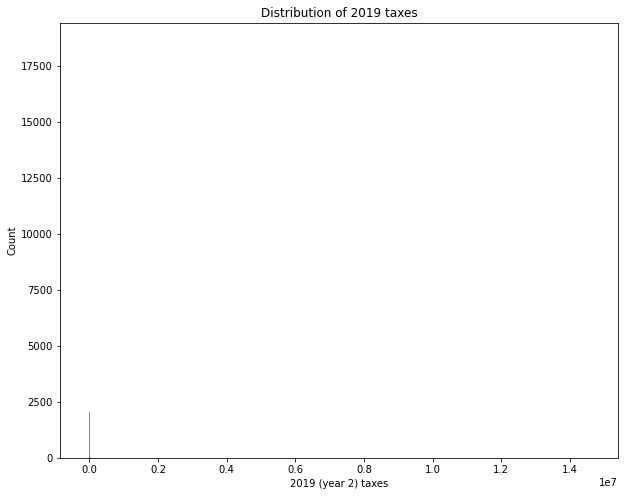

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.histplot(x='PY2TAX',data=Integ[])
plt.title('Distribution of 2019 taxes')
plt.xlabel('2019 (year 2) taxes')

In [46]:
Integ.describe()

,INTERNALID,LANDAREA,PRMS_WARD,TAXRATE,SALEPRICE,ASSESSMENT,ANNUALTAX,PY1YEAR,PY1TAX,PY1TOTDUE,PY2YEAR,PY2TAX,PY2TOTDUE
count,2.128480e+05,2.128480e+05,212833.000000,212848.000000,2.128480e+05,2.128480e+05,2.128480e+05,212848.0,2.128480e+05,2.128480e+05,212848.0,2.128480e+05,2.128480e+05
mean,1.375895e+06,6.919212e+03,4.269733,0.918273,1.526573e+06,1.700629e+06,1.416262e+04,2020.0,1.290816e+04,1.231100e+04,2019.0,1.234160e+04,9.134861e+03
std,1.496495e+05,2.218614e+05,2.122699,0.461279,3.179582e+07,1.720371e+07,1.697950e+05,0.0,1.604538e+05,1.794467e+05,0.0,1.597260e+05,3.680987e+05
min,6.562970e+05,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,-2.321760e+03,2020.0,-9.534346e+04,-1.272961e+07,2019.0,-1.123921e+05,-6.917718e+07
25%,1.251828e+06,4.080000e+02,2.000000,0.850000,0.000000e+00,3.098400e+05,1.595615e+03,2020.0,1.332075e+03,1.354153e+03,2019.0,1.170710e+03,1.190203e+03
50%,1.365854e+06,1.523000e+03,4.000000,0.850000,1.750000e+05,5.333700e+05,3.518610e+03,2020.0,3.272860e+03,3.316120e+03,2019.0,3.049570e+03,3.084660e+03
75%,1.497801e+06,3.027000e+03,6.000000,0.850000,5.500000e+05,8.640725e+05,6.466105e+03,2020.0,6.092690e+03,6.167690e+03,2019.0,5.749660e+03,5.824435e+03
max,1.703908e+06,7.040006e+07,8.000000,10.000000,1.360000e+10,2.090929e+09,1.456645e+07,2020.0,1.485269e+07,3.589610e+07,2019.0,1.466547e+07,4.401805e+07


<AxesSubplot:xlabel='PY2TAX', ylabel='Count'>

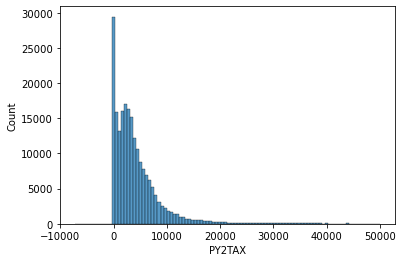

In [57]:
sns.histplot(x='PY2TAX',data=Integ[(Integ['PY2TAX'] > -10000) & (Integ['PY2TAX'] < 50000)],bins=100)

In [65]:
Integ['2019ASSESSMENT'] = round((Integ['PY2TAX'] / Integ['TAXRATE']),2)

In [69]:
Integ.dtypes

INTERNALID          int64
SSL                object
SQUARE             object
PROPTYPE           object
LANDAREA            int64
PRMS_WARD         float64
PREMISEADD         object
NBHDNAME           object
TAXRATE           float64
SALEPRICE           int64
SALEDATE           object
ASSESSMENT          int64
ANNUALTAX         float64
PY1YEAR             int64
PY1TAX            float64
PY1TOTDUE         float64
PY2YEAR             int64
PY2TAX            float64
PY2TOTDUE         float64
2019ASSESSMENT    float64
dtype: object

In [93]:
prop_types = Integ['PROPTYPE'].apply(lambda x: (str(x).split('-')[0]).split()[0]).unique().tolist()

Integ['GEN_PROPTYPE'] = Integ['PROPTYPE'].apply(lambda x: (str(x).split('-')[0]).split()[0])

res_list = ('Residential','Condominium','Fraternity/Sorority','Dormitory')
com_list = [a for a in prop_types if a not in res_list]

def decide_res_comm(x):
    if x in res_list:
        return 'residential'
    elif x in com_list:
        return 'commercial'
    else:
        return 'uncategorized'
    
Integ['RESCOMM'] = Integ['GEN_PROPTYPE'].apply(decide_res_comm)

In [78]:
Integ['RESCOMM'].value_counts()

residential    189352
commercial      23496
Name: RESCOMM, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.boxplot(x='PY2TAX',hue='GEN_PROPTYPE',data=Integ[Integ['RESCOMM'] == 'residential'])
plt.title('Distribution of 2019 taxes  for residential properties')
plt.xlabel('2019 (year 2) taxes')

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.histplot(x='PY2TAX',hue='GEN_PROPTYPE',data=Integ[Integ['RESCOMM'] == 'commercial'])
plt.title('Distribution of 2019 taxes for commercial properties')
plt.xlabel('2019 (year 2) taxes')

In [ ]:
trulia = pd.read_excel('trulia_oct_2021.xlsx')
trulia

In [94]:
Integ.to_csv('DC_Integrated_tax_clean.csv')

In [132]:
Residential = Integ[Integ['RESCOMM'] == 'residential']
Commercial = Integ[Integ['RESCOMM'] == 'commercial']

In [97]:
Residential['GEN_PROPTYPE'].value_counts()

Residential            182709
Condominium              6575
Dormitory                  62
Fraternity/Sorority         6
Name: GEN_PROPTYPE, dtype: int64

In [98]:
Commercial['GEN_PROPTYPE'].value_counts()

Vacant          11958
Store            3226
Commercial       2891
nan              1066
Parking           717
Religious         691
Special           429
Industrial        423
Educational       403
Office            312
Embassy           243
Hotel             209
Public            170
Restaurants       124
Vehicle           109
Garage            104
Recreational       97
Medical            78
Fast               61
Museums            61
Theaters           32
Health             28
Club               27
Inn                12
Cooperative        12
Tourist             8
Motel               5
Name: GEN_PROPTYPE, dtype: int64

<AxesSubplot:xlabel='PY2TAX', ylabel='Count'>

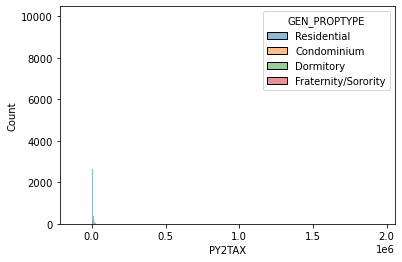

In [99]:
sns.histplot(x='PY2TAX',hue='GEN_PROPTYPE',data=Residential)

In [130]:
def year_2019_assess(tax):
    if tax['TAXRATE'] == 0:
        return 0
    else:
        return round(tax['PY2TAX']/tax['TAXRATE'],2)

Integ['2019ASSESSMENT'] = Integ[['PY2TAX','TAXRATE']].apply(year_2019_assess,axis=1).astype(float)
Integ['2019ASSESSMENT']

0            672.59
1           1701.70
2              0.00
3            395.50
4         107158.11
            ...    
212843       373.29
212844      4064.52
212845      5121.05
212846      2387.62
212847     16975.91
Name: 2019ASSESSMENT, Length: 212848, dtype: float64

In [125]:
Integ['2019ASSESSMENT'].mean()

9175.560660048357

<AxesSubplot:ylabel='2019ASSESSMENT'>

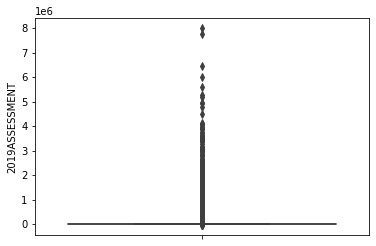

In [134]:
sns.boxplot(y='2019ASSESSMENT',hue='GEN_PROPTYPE',data=Commercial)

In [135]:
Commercial.GEN_PROPTYPE.value_counts()

Vacant          11958
Store            3226
Commercial       2891
nan              1066
Parking           717
Religious         691
Special           429
Industrial        423
Educational       403
Office            312
Embassy           243
Hotel             209
Public            170
Restaurants       124
Vehicle           109
Garage            104
Recreational       97
Medical            78
Fast               61
Museums            61
Theaters           32
Health             28
Club               27
Inn                12
Cooperative        12
Tourist             8
Motel               5
Name: GEN_PROPTYPE, dtype: int64

In [9]:
Integ = pd.read_csv('DC_Integrated_tax_clean.csv')
Integ.drop(['Unnamed: 0'],axis=1,inplace=True)
Integ.head(2)

,INTERNALID,SSL,SQUARE,PROPTYPE,LANDAREA,PRMS_WARD,PREMISEADD,NBHDNAME,TAXRATE,SALEPRICE,...,ASSESSMENT,ANNUALTAX,PY1YEAR,PY1TAX,PY1TOTDUE,PY2YEAR,PY2TAX,PY2TOTDUE,GEN_PROPTYPE,RESCOMM
0,668949,PIPAR3000184,PIPA,Special Purpose (Miscellaneous,12919556,3.0,CANAL RD NW WASHINGTON DC 20007,Palisades,1.65,0,...,67260,1109.80,2020,1109.78,1109.78,2019,1109.78,1198.56,Special,commercial
1,668949,PIPAR6400172,PIPA,Vacant-True,2097414,4.0,NW WASHINGTON DC 00000,North Rock Creek Park,1.65,0,...,170170,2807.82,2020,2807.80,2807.80,2019,2807.80,2807.80,Vacant,commercial


In [5]:
trulia = pd.read_excel('trulia_oct_2021.xlsx')
trulia.head()

,price,bed,bath,size,address
0,"$1,350/mo",1bd,1ba,500 sqft,"433 Manor Pl NW #BASEMENT Washington, DC 20010"
1,"$1,700/mo",1bd,1ba,650 sqft,"1535 Gales St NE #1B Washington, DC 20002"
2,"$2,500/mo",2bd,1ba,980 sqft,"1811 Newton St NW Washington, DC 20010"
3,"$1,650/mo",Studio,1ba,437 sqft,"1718 P St NW #801 Washington, DC 20036"
4,"$1,600/mo",2bd,1ba,850 sqft,"306 Atlantic St SE #B Washington, DC 20032"


In [49]:
loopnet = pd.read_excel('loopnet_oct_2021.xlsx')
loopnet

,name,description,category,price,address
0,1500 K St NW,"2,229 SF Office Building Offered in Washington, DC",Office,NaN,1500 K St NW
1,Ronald Reagan Building,"71,607 SF Office Building Offered at $29.00 - $50.00 SF/Yr in Washington, DC",Office,$29.00 - $50.00 SF/Yr,1300 Pennsylvania Ave NW
2,1500 K St NW,"27,884 SF Office Building Offered at $62.00 SF/Yr in Washington, DC",Office,$62.00 SF/Yr,1500 K St NW
3,Ronald Reagan Building,"2,166 SF Office Building Offered at $40.00 SF/Yr in Washington, DC",Office,$40.00 SF/Yr,1300 Pennsylvania Ave NW
4,Midtown Center,"52,865 SF Office Building Offered in Washington, DC",Office,NaN,1100 15th St NW
5,7220 Wisconsin Ave,"2,150 SF Office Building Offered at $48.00 SF/Yr in Bethesda, MD",Office,$48.00 SF/Yr,7220 Wisconsin Ave
6,7220 Wisconsin Ave,"29,225 SF Office Building Offered at $20.00 - $25.00 SF/Yr in Bethesda, MD",Office,$20.00 - $25.00 SF/Yr,7220 Wisconsin Ave
7,Universal Building North,"231,728 SF Office Building Offered in Washington, DC",Office,NaN,1875 Connecticut Ave NW
8,The Mark/ Wonder Bread Factory,"32,903 SF Office Building Offered in Washington, DC",Office,NaN,641 S St NW
9,Building A,"18,050 SF Office Building Offered in Washington, DC",Office,NaN,1346 Florida Ave NW


In [50]:
# Integ['STREET'] = Integ['PREMISEADD'].apply(lambda x: str(x).split(' WASHINGTON')[0])
loopnet['STREET'] = loopnet['address'].apply(lambda x: x.upper())

In [23]:
# are the DC addresses unique
commercial = Integ[Integ['RESCOMM'] == 'commercial'].copy()

In [51]:
loopnet = loopnet.sort_values(by=['STREET','description']).reset_index(drop=True)

In [52]:
loopnet['isDup'] = loopnet.duplicated(keep='first')

In [56]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_colwidth',300)
ln = loopnet[~loopnet['isDup']].sort_values(by = ['name','description'])
ln

,name,description,category,price,address,STREET,isDup
66,1300 Conn,"75,917 SF Office Building Offered at $55.00 - $64.00 SF/Yr in Washington, DC",Office,$55.00 - $64.00 SF/Yr,1300 Connecticut Ave NW,1300 CONNECTICUT AVE NW,False
198,1500 K St NW,"27,884 SF Office Building Offered at $62.00 SF/Yr in Washington, DC",Office,$62.00 SF/Yr,1500 K St NW,1500 K ST NW,False
231,1500 K St NW,"2,229 SF Office Building Offered in Washington, DC",Office,NaN,1500 K St NW,1500 K ST NW,False
264,1730 Pennsylvania Ave NW,"142,325 SF Office Building Offered at $56.50 - $59.00 SF/Yr in Washington, DC",Office,$56.50 - $59.00 SF/Yr,1730 Pennsylvania Ave NW,1730 PENNSYLVANIA AVE NW,False
297,1775 Pennsylvania Ave NW,"64,298 SF Office Building Offered at $39.00 - $77.00 SF/Yr in Washington, DC",Office,$39.00 - $77.00 SF/Yr,1775 Pennsylvania Ave NW,1775 PENNSYLVANIA AVE NW,False
495,2050 M St NW,"66,228 SF Office Building Offered at $42.00 - $57.00 SF/Yr in Washington, DC",Office,$42.00 - $57.00 SF/Yr,2050 M St NW,2050 M ST NW,False
594,7220 Wisconsin Ave,"29,225 SF Office Building Offered at $20.00 - $25.00 SF/Yr in Bethesda, MD",Office,$20.00 - $25.00 SF/Yr,7220 Wisconsin Ave,7220 WISCONSIN AVE,False
627,7220 Wisconsin Ave,"2,150 SF Office Building Offered at $48.00 SF/Yr in Bethesda, MD",Office,$48.00 SF/Yr,7220 Wisconsin Ave,7220 WISCONSIN AVE,False
528,AdvantEdge Workspaces - Downtown,"40,000 SF Office Building Offered in Washington, DC",Office,NaN,2101 L St NW,2101 L ST NW,False
165,Building A,"18,050 SF Office Building Offered in Washington, DC",Office,NaN,1346 Florida Ave NW,1346 FLORIDA AVE NW,False


In [67]:
pd.set_option('display.max_rows',25)

comm = Integ.merge(ln, how='left', on='STREET', indicator=False, validate=None).sort_values(by='PREMISEADD').drop(['address','isDup'],axis=1)
comm

,INTERNALID,SSL,SQUARE,PROPTYPE,LANDAREA,PRMS_WARD,PREMISEADD,NBHDNAME,TAXRATE,SALEPRICE,...,PY2YEAR,PY2TAX,PY2TOTDUE,GEN_PROPTYPE,RESCOMM,STREET,name,description,category,price
70347,1289851,2884 0843,2884,Parking Lot-Special Purpose,334,1.0,0 EUCLID ST NW WASHINGTON DC 20001,Columbia Heights,0.00,0,...,2019,0.00,0.00,Parking,commercial,0 EUCLID ST NW,NaN,NaN,NaN,NaN
74244,1298043,2884 0841,2884,Parking Lot-Special Purpose,334,1.0,0 FAIRMONT ST NW WASHINGTON DC 20001,Columbia Heights,0.00,0,...,2019,0.00,0.00,Parking,commercial,0 FAIRMONT ST NW,NaN,NaN,NaN,NaN
19828,1180859,6151 0042,6151,Vacant-Permit,10967,8.0,0017 MISSISSIPPI AVE SE WASHINGTON DC 20032,Congress Heights,0.85,0,...,2019,0.00,0.00,Vacant,commercial,0017 MISSISSIPPI AVE SE,NaN,NaN,NaN,NaN
68063,1286141,1035 0075,1035,Residential-Conversion (Less T,1470,6.0,1 13TH ST NE WASHINGTON DC 20002-6411,Old City 1,0.85,0,...,2019,4679.48,4679.48,Residential,residential,1 13TH ST NE,NaN,NaN,NaN,NaN
189669,1585233,1057 2073,1057,Residential-Condominium (Horiz,621,6.0,1 14TH ST NE # 1 WASHINGTON DC 20002-8418,Old City 1,0.85,399999,...,2019,2136.56,2136.56,Residential,residential,1 14TH ST NE # 1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,742853,NaN,NaN,NaN,0,NaN,NaN,NaN,0.00,0,...,2019,103066.22,114300.44,NaN,commercial,nan,NaN,NaN,NaN,NaN
149,779958,NaN,NaN,NaN,0,NaN,NaN,NaN,0.00,0,...,2019,0.00,0.00,NaN,commercial,nan,NaN,NaN,NaN,NaN
189,823637,NaN,NaN,NaN,0,NaN,NaN,NaN,1.65,0,...,2019,0.00,0.00,NaN,commercial,nan,NaN,NaN,NaN,NaN
292,935336,NaN,NaN,NaN,0,NaN,NaN,NaN,0.00,0,...,2019,38350.46,57717.47,NaN,commercial,nan,NaN,NaN,NaN,NaN


In [66]:
trulia['STR'] = trulia['address'].apply(lambda x: x.split(' Washington')[0])
pd.set_option('display.max_rows',2000)
trulia.sort_values(by='STR')

,price,bed,bath,size,address,STR
1553,"$2,025/mo",1bd,1ba,983 sqft,"1 N St NW #A Washington, DC 20001",1 N St NW #A
1767,"$1,695/mo",1bd,1ba,NaN,"1 bed, $1,695 Washington, DC 20018","1 bed, $1,695"
1763,"$1,750/mo",1bd,1ba,NaN,"1 bed, $1,750 Washington, DC 20009","1 bed, $1,750"
1753,"$1,795/mo",1bd,1ba,NaN,"1 bed, $1,795 Washington, DC 20003","1 bed, $1,795"
1782,"$1,312/mo",1bd,1ba,NaN,"1 bed, 1.0 bath, $1,312 Washington, DC 20010","1 bed, 1.0 bath, $1,312"
1755,"$1,375/mo",1bd,1ba,NaN,"1 bed, 1.0 bath, $1,375 Washington, DC 20002","1 bed, 1.0 bath, $1,375"
1757,"$1,500/mo",1bd,1ba,NaN,"1 bed, 25 sqft, $1,500 Washington, DC 20007","1 bed, 25 sqft, $1,500"
1768,"$2,149/mo",1bd,1ba,NaN,"1 bed, 410 sqft, $2,149 Washington, DC 20009","1 bed, 410 sqft, $2,149"
1790,"$1,586/mo",1bd,1ba,NaN,"1 bed, 550 sqft, $1,586 Washington, DC 20002","1 bed, 550 sqft, $1,586"
1775,"$2,100/mo",1bd,1ba,NaN,"1 bed, 725 sqft, $2,100 Washington, DC 20009","1 bed, 725 sqft, $2,100"


In [68]:
trulia

,price,bed,bath,size,address,STR
0,"$1,350/mo",1bd,1ba,500 sqft,"433 Manor Pl NW #BASEMENT Washington, DC 20010",433 Manor Pl NW #BASEMENT
1,"$1,700/mo",1bd,1ba,650 sqft,"1535 Gales St NE #1B Washington, DC 20002",1535 Gales St NE #1B
2,"$2,500/mo",2bd,1ba,980 sqft,"1811 Newton St NW Washington, DC 20010",1811 Newton St NW
3,"$1,650/mo",Studio,1ba,437 sqft,"1718 P St NW #801 Washington, DC 20036",1718 P St NW #801
4,"$1,600/mo",2bd,1ba,850 sqft,"306 Atlantic St SE #B Washington, DC 20032",306 Atlantic St SE #B
...,...,...,...,...,...,...
1786,"$1,600/mo",1bd,1ba,NaN,"1 bed, 850 sqft, $1,600 Washington, DC 20002","1 bed, 850 sqft, $1,600"
1787,"$1,850/mo",2bd,1ba,NaN,"1715 Hamlin St. NE Washington, DC 20018",1715 Hamlin St. NE
1788,"$1,575/mo",Studio,1ba,NaN,"Studio, 1.0 bath, $1,575 Washington, DC 20009","Studio, 1.0 bath, $1,575"
1789,"$1,773 - $2,395/mo",1-2bd,1ba,NaN,"2530 Q St NW Washington, DC 20007",2530 Q St NW


In [73]:
trulia['STREET'] = trulia['STR'].apply(lambda x: x.split('#')[0])

IndexError: list index out of range

In [99]:
trulia_street = trulia[~trulia['STREET'].str.contains('\$')].copy()

In [101]:
trulia_street['STREET'] = trulia_street['STREET'].str.upper().str.replace(".","")

In [105]:
trulia_street = trulia_street.sort_values(by='STREET').reset_index(drop=True)

In [108]:
trulia_street['isDup'] = trulia_street.duplicated(keep='first')

In [111]:
trulia_str = trulia_street[~trulia_street.isDup].copy()

In [116]:
trulia_st = trulia_str[['price','bed','bath','size','address','STREET']].copy()

In [115]:
comm.head(1)

,INTERNALID,SSL,SQUARE,PROPTYPE,LANDAREA,PRMS_WARD,PREMISEADD,NBHDNAME,TAXRATE,SALEPRICE,...,PY2YEAR,PY2TAX,PY2TOTDUE,GEN_PROPTYPE,RESCOMM,STREET,name,description,category,price
70347,1289851,2884 0843,2884,Parking Lot-Special Purpose,334,1.0,0 EUCLID ST NW WASHINGTON DC 20001,Columbia Heights,0.0,0,...,2019,0.0,0.0,Parking,commercial,0 EUCLID ST NW,NaN,NaN,NaN,NaN


In [118]:
rescomm = comm.merge(trulia_st, how='left', on='STREET')

In [123]:
rescomm.price_x = rescomm.price_x.fillna(0)
rescomm.price_y = rescomm.price_y.fillna(0)
# rescomm['price'] = float(rescomm.price_x) + float(rescomm.price_y)

In [128]:
type(rescomm['price_y'][0])

int

In [132]:
rescomm.to_excel('rescomm.xlsx',index=False)

In [133]:
1

1

In [3]:
rescomm = pd.read_excel('rescomm.xlsx')

In [4]:
rescomm.head()

,INTERNALID,SSL,SQUARE,PROPTYPE,LANDAREA,PRMS_WARD,PREMISEADD,NBHDNAME,TAXRATE,SALEPRICE,...,STREET,name,description,category,price_x,price_y,bed,bath,size,address
0,1289851,2884 0843,2884,Parking Lot-Special Purpose,334,1.0,0 EUCLID ST NW WASHINGTON DC 20001,Columbia Heights,0.00,0,...,0 EUCLID ST NW,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1298043,2884 0841,2884,Parking Lot-Special Purpose,334,1.0,0 FAIRMONT ST NW WASHINGTON DC 20001,Columbia Heights,0.00,0,...,0 FAIRMONT ST NW,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1180859,6151 0042,6151,Vacant-Permit,10967,8.0,0017 MISSISSIPPI AVE SE WASHINGTON DC 20032,Congress Heights,0.85,0,...,0017 MISSISSIPPI AVE SE,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1286141,1035 0075,1035,Residential-Conversion (Less T,1470,6.0,1 13TH ST NE WASHINGTON DC 20002-6411,Old City 1,0.85,0,...,1 13TH ST NE,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1585233,1057 2073,1057,Residential-Condominium (Horiz,621,6.0,1 14TH ST NE # 1 WASHINGTON DC 20002-8418,Old City 1,0.85,399999,...,1 14TH ST NE # 1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [5]:
def year_2019_assess(tax):
    if tax['TAXRATE'] == 0:
        return 0
    else:
        return round(tax['PY2TAX']/tax['TAXRATE'],2)
    
rescomm['2019ASSESSMENT'] = rescomm[['PY2TAX','TAXRATE']].apply(year_2019_assess,axis=1).astype(float)

# properties with 0 tax rate unable to find assessment, will review DC tax policies
rescomm['2019ASSESSMENT']

0            0.00
1            0.00
2            0.00
3         5505.27
4         2513.60
           ...   
212867       0.00
212868       0.00
212869       0.00
212870       0.00
212871       0.00
Name: 2019ASSESSMENT, Length: 212872, dtype: float64

In [142]:
rescomm.columns

Index(['INTERNALID', 'SSL', 'SQUARE', 'PROPTYPE', 'LANDAREA', 'PRMS_WARD',
       'PREMISEADD', 'NBHDNAME', 'TAXRATE', 'SALEPRICE', 'SALEDATE',
       'ASSESSMENT', 'ANNUALTAX', 'PY1YEAR', 'PY1TAX', 'PY1TOTDUE', 'PY2YEAR',
       'PY2TAX', 'PY2TOTDUE', 'GEN_PROPTYPE', 'RESCOMM', 'STREET', 'name',
       'description', 'category', 'price_x', 'price_y', 'bed', 'bath', 'size',
       'address', '2019ASSESSMENT'],
      dtype='object')

In [6]:
pd.set_option('display.max_rows',1000)
rescomm[['NBHDNAME','2019ASSESSMENT','GEN_PROPTYPE']].sort_values(by='2019ASSESSMENT', ascending=False)

,NBHDNAME,2019ASSESSMENT,GEN_PROPTYPE
12751,Washington Navy Yard,8010808.52,Commercial
131881,R. L. A. SW,7759506.00,Commercial
63167,Central,6460000.00,Commercial
4427,Central,5995000.00,Commercial
5580,Central,5596777.80,Commercial
...,...,...,...
56288,Mount Pleasant,-40129.32,Residential
143385,Deanwood,-40798.09,Vacant
12714,Central,-44854.39,Commercial
179130,Central,-53280.41,Commercial


(array([     0., 100000., 200000., 300000., 400000., 500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

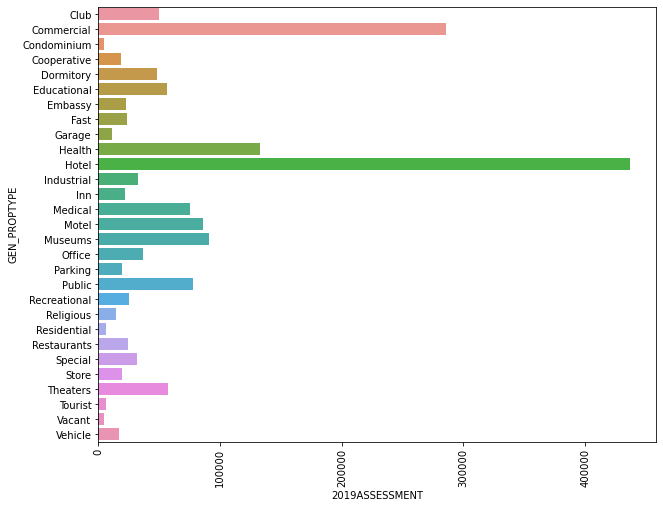

In [20]:
rcs = rescomm[rescomm['2019ASSESSMENT'] > 0].copy()

rc = rcs.groupby('GEN_PROPTYPE').mean().reset_index()[['GEN_PROPTYPE','2019ASSESSMENT']]

plt.figure(figsize=(10,8))
sns.barplot(x = '2019ASSESSMENT',y='GEN_PROPTYPE',data=rc)
plt.xticks(rotation=90)

In [21]:
rescomm['RESCOMM'].value_counts()

residential    189352
commercial      23520
Name: RESCOMM, dtype: int64

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

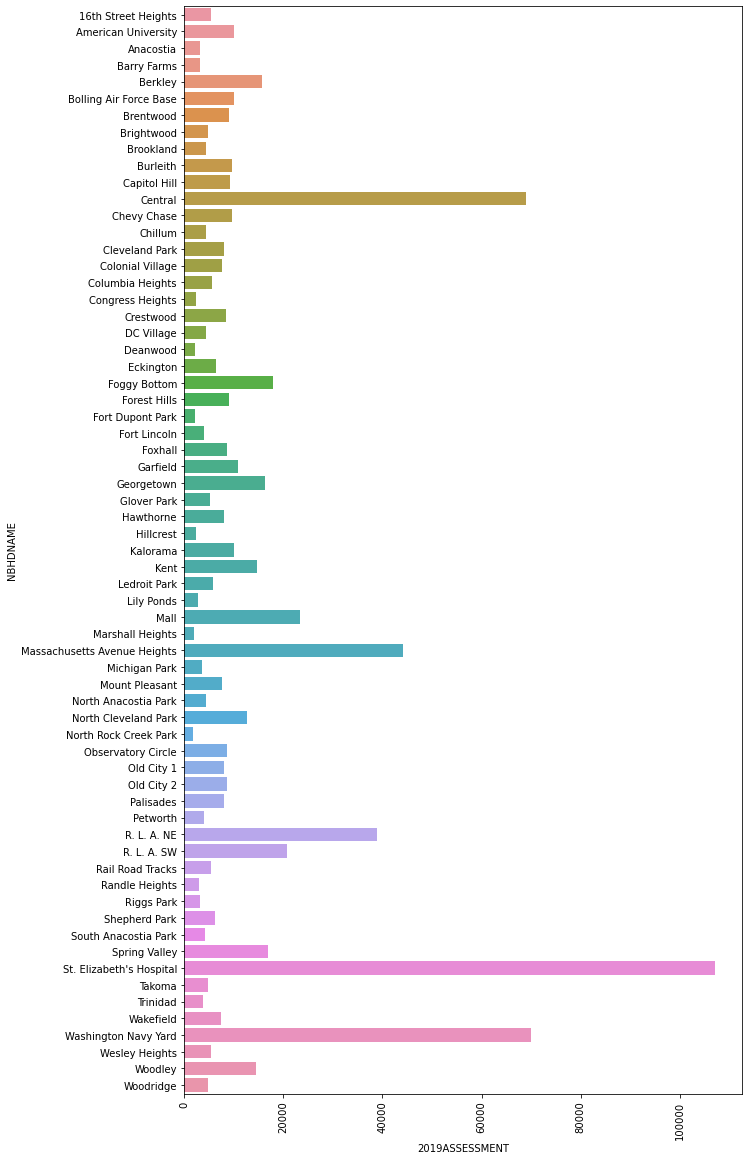

In [18]:
rcs = rescomm[rescomm['2019ASSESSMENT'] > 0].copy()

rc = rcs.groupby('NBHDNAME').mean().reset_index()[['NBHDNAME','2019ASSESSMENT']]

plt.figure(figsize=(10,20))
sns.barplot(y = 'NBHDNAME',x='2019ASSESSMENT',data=rc)
plt.xticks(rotation=90)

In [1]:
import pandas as pd
df = pd.read_excel('rescomm.xlsx')
df

,INTERNALID,SSL,SQUARE,PROPTYPE,LANDAREA,PRMS_WARD,PREMISEADD,NBHDNAME,TAXRATE,SALEPRICE,...,STREET,name,description,category,price_x,price_y,bed,bath,size,address
0,1289851,2884 0843,2884,Parking Lot-Special Purpose,334,1.0,0 EUCLID ST NW WASHINGTON DC 20001,Columbia Heights,0.00,0,...,0 EUCLID ST NW,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1298043,2884 0841,2884,Parking Lot-Special Purpose,334,1.0,0 FAIRMONT ST NW WASHINGTON DC 20001,Columbia Heights,0.00,0,...,0 FAIRMONT ST NW,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1180859,6151 0042,6151,Vacant-Permit,10967,8.0,0017 MISSISSIPPI AVE SE WASHINGTON DC 20032,Congress Heights,0.85,0,...,0017 MISSISSIPPI AVE SE,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1286141,1035 0075,1035,Residential-Conversion (Less T,1470,6.0,1 13TH ST NE WASHINGTON DC 20002-6411,Old City 1,0.85,0,...,1 13TH ST NE,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1585233,1057 2073,1057,Residential-Condominium (Horiz,621,6.0,1 14TH ST NE # 1 WASHINGTON DC 20002-8418,Old City 1,0.85,399999,...,1 14TH ST NE # 1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212867,742853,NaN,NaN,NaN,0,NaN,NaN,NaN,0.00,0,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
212868,779958,NaN,NaN,NaN,0,NaN,NaN,NaN,0.00,0,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
212869,823637,NaN,NaN,NaN,0,NaN,NaN,NaN,1.65,0,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
212870,935336,NaN,NaN,NaN,0,NaN,NaN,NaN,0.00,0,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [2]:
df.columns

Index(['INTERNALID', 'SSL', 'SQUARE', 'PROPTYPE', 'LANDAREA', 'PRMS_WARD',
       'PREMISEADD', 'NBHDNAME', 'TAXRATE', 'SALEPRICE', 'SALEDATE',
       'ASSESSMENT', 'ANNUALTAX', 'PY1YEAR', 'PY1TAX', 'PY1TOTDUE', 'PY2YEAR',
       'PY2TAX', 'PY2TOTDUE', 'GEN_PROPTYPE', 'RESCOMM', 'STREET', 'name',
       'description', 'category', 'price_x', 'price_y', 'bed', 'bath', 'size',
       'address'],
      dtype='object')

In [4]:
df[df['PY2TAX'] < 0][['PREMISEADD','TAXRATE','PY2TAX']]

,PREMISEADD,TAXRATE,PY2TAX
2769,1018 4TH ST SE WASHINGTON DC 20003-3439,0.85,-404.00
4433,1050 THOMAS JEFFERSON ST NW WASHINGTON DC 20007,1.89,-49814.54
5129,1099 22ND ST NW # 1005 WASHINGTON DC 20037,0.85,-219.72
5154,1099 22ND ST NW # 305 WASHINGTON DC 20037,0.85,-164.82
5349,10TH ST SE WASHINGTON DC 20003,0.85,-0.12
...,...,...,...
211641,SE WASHINGTON DC 00000,0.85,-0.06
211755,SHERIDAN ST NW WASHINGTON DC 20011,0.85,-0.12
212378,UNDERWOOD ST NW WASHINGTON DC 20012,0.85,-0.12
212441,V ST SE WASHINGTON DC 20020,0.85,-1596.34


In [5]:
df[df['TAXRATE'] < 0]

,INTERNALID,SSL,SQUARE,PROPTYPE,LANDAREA,PRMS_WARD,PREMISEADD,NBHDNAME,TAXRATE,SALEPRICE,...,STREET,name,description,category,price_x,price_y,bed,bath,size,address


In [7]:
pd.set_option('display.max_rows',100)
df.PROPTYPE.value_counts()

Residential-Single Family (Row    45627
Residential-Single Family (Det    31740
Residential-Condominium (Verti    29898
Residential-Condominium (Horiz    27892
Residential-Single Family (Sem    16639
Residential-Condominium (Garag    13364
Residential-Conversion (Less T     8434
Vacant-True                        5798
Condominium-Investment (Vertic     5247
Residential-Flats (Less Than 5     4341
Residential-Apartment (Walkup)     2462
Vacant-Zoning Limits               2460
Vacant-False-Abutting              2355
Store-Miscellaneous                1741
Condominium-Investment (Horizo     1319
Vacant-Permit                      1032
Commercial-Office (Large)           990
Store-Small (1 Story)               804
Parking Lot-Special Purpose         717
Religious                           691
Residential-Apartment (Elevato      661
Residential-Garage                  644
Commercial-Retail (Miscellaneo      608
Special Purpose (Miscellaneous      427
Educational                         403


In [6]:
import numpy as np
import pandas as pd
import os
import folium
from folium import plugins
import pygeohash as geoh
import geopy as geo
from datetime import datetime
import calendar
from datetime import timezone
import datetime
import pytz
from pyspark.sql import functions as f
import pyspark.sql
import glob

In [25]:
df = pd.read_csv('DC_Integrated_tax_clean.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,INTERNALID,SSL,SQUARE,PROPTYPE,LANDAREA,PRMS_WARD,PREMISEADD,NBHDNAME,TAXRATE,SALEPRICE,...,ASSESSMENT,ANNUALTAX,PY1YEAR,PY1TAX,PY1TOTDUE,PY2YEAR,PY2TAX,PY2TOTDUE,GEN_PROPTYPE,RESCOMM
0,668949,PIPAR3000184,PIPA,Special Purpose (Miscellaneous,12919556,3.0,CANAL RD NW WASHINGTON DC 20007,Palisades,1.65,0,...,67260,1109.80,2020,1109.78,1109.78,2019,1109.78,1198.56,Special,commercial
1,668949,PIPAR6400172,PIPA,Vacant-True,2097414,4.0,NW WASHINGTON DC 00000,North Rock Creek Park,1.65,0,...,170170,2807.82,2020,2807.80,2807.80,2019,2807.80,2807.80,Vacant,commercial
2,672394,NaN,NaN,NaN,0,NaN,NaN,NaN,0.00,0,...,0,1994.86,2020,1994.84,1994.84,2019,1994.84,1994.84,NaN,commercial
3,656297,PI0002570034,PI00,Vacant-True,46161,2.0,1300 E ST NW WASHINGTON DC 20004,Mall,1.65,0,...,39550,652.58,2020,652.58,714.56,2019,652.58,652.58,Vacant,commercial
4,657169,PI0S58680417,PI0S,Recreational,139006,8.0,1100 OAK DRIVE SE WASHINGTON DC 20032,St. Elizabeth's Hospital,1.89,0,...,10715810,202528.82,2020,202528.82,219743.76,2019,202528.82,219743.76,Recreational,commercial


In [26]:
df[:1000]

,INTERNALID,SSL,SQUARE,PROPTYPE,LANDAREA,PRMS_WARD,PREMISEADD,NBHDNAME,TAXRATE,SALEPRICE,...,ASSESSMENT,ANNUALTAX,PY1YEAR,PY1TAX,PY1TOTDUE,PY2YEAR,PY2TAX,PY2TOTDUE,GEN_PROPTYPE,RESCOMM
0,668949,PIPAR3000184,PIPA,Special Purpose (Miscellaneous,12919556,3.0,CANAL RD NW WASHINGTON DC 20007,Palisades,1.65,0,...,67260,1109.80,2020,1109.78,1109.78,2019,1109.78,1198.56,Special,commercial
1,668949,PIPAR6400172,PIPA,Vacant-True,2097414,4.0,NW WASHINGTON DC 00000,North Rock Creek Park,1.65,0,...,170170,2807.82,2020,2807.80,2807.80,2019,2807.80,2807.80,Vacant,commercial
2,672394,NaN,NaN,NaN,0,NaN,NaN,NaN,0.00,0,...,0,1994.86,2020,1994.84,1994.84,2019,1994.84,1994.84,NaN,commercial
3,656297,PI0002570034,PI00,Vacant-True,46161,2.0,1300 E ST NW WASHINGTON DC 20004,Mall,1.65,0,...,39550,652.58,2020,652.58,714.56,2019,652.58,652.58,Vacant,commercial
4,657169,PI0S58680417,PI0S,Recreational,139006,8.0,1100 OAK DRIVE SE WASHINGTON DC 20032,St. Elizabeth's Hospital,1.89,0,...,10715810,202528.82,2020,202528.82,219743.76,2019,202528.82,219743.76,Recreational,commercial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1115821,0155 2025,0155,Residential-Condominium (Horiz,242,2.0,1754 CORCORAN ST NW # 54B WASHINGTON DC 20009,Old City 2,0.85,0,...,279540,2263.10,2020,2269.96,2269.96,2019,2195.90,2195.90,Residential,residential
996,1115991,2823 2005,2823,Residential-Condominium (Verti,437,4.0,1300 TAYLOR ST NW # 101 WASHINGTON DC 20011,Columbia Heights,0.85,525000,...,538360,3814.10,2020,3600.54,3600.54,2019,3932.96,3932.96,Residential,residential
997,1115995,5889 0023,5889,Residential-Single Family (Sem,1840,8.0,1468 CONGRESS PL SE WASHINGTON DC 20020,Randle Heights,0.85,0,...,218510,496.16,2020,475.14,475.14,2019,455.96,455.96,Residential,residential
998,1115997,2068 2047,2068,Residential-Condominium (Horiz,737,3.0,2926 PORTER ST NW # 204 WASHINGTON DC 20008-3200,Cleveland Park,0.85,244496,...,500230,3489.98,2020,3378.10,3389.99,2019,3193.20,3193.20,Residential,residential


In [40]:
len(df.dropna(subset=['PREMISEADD']))

212833

In [42]:
df2 = df.dropna(subset=['PREMISEADD'])

In [70]:
# Had to clean out apartment code followed by #

In [46]:
bad_adds = df2[df2.PREMISEADD.str.contains('#')]['PREMISEADD'].copy()

In [58]:
splits = bad_adds.apply(lambda x: x.split('#'))
city = splits.apply(lambda x: " ".join(x[1].split()[1:]))
street = splits.apply(lambda x: x[0])
good_adds = street + " " + city
good_adds

116          2939 VAN NESS ST NW  WASHINGTON DC 20008
314               955 26TH ST NW  WASHINGTON DC 20037
316                 1824 S ST NW  WASHINGTON DC 20009
318              1410 12TH ST NW  WASHINGTON DC 20005
325            1718 P ST NW  WASHINGTON DC 20036-1438
                             ...                     
212836       1300 4TH ST SE  WASHINGTON DC 20003-2554
212837     5201 WISCONSIN AVE NW  WASHINGTON DC 20015
212839       6645 GEORGIA AVE NW  WASHINGTON DC 20012
212840    4200 MASSACHUSETTS AVE NW  WASHINGTON DC 20
212842            1001 3RD ST SW  WASHINGTON DC 20024
Name: PREMISEADD, Length: 79746, dtype: object

In [63]:
df2["REALADD"] = df2.PREMISEADD.copy()

<ipython-input-63-ff9bcb11a58d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["REALADD"] = df2.PREMISEADD.copy()


In [68]:
df2.loc[df2["PREMISEADD"].str.contains('#'),"REALADD"] = good_adds

/apps/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [69]:
df2[df2["REALADD"].str.contains('#')]

,INTERNALID,SSL,SQUARE,PROPTYPE,LANDAREA,PRMS_WARD,PREMISEADD,NBHDNAME,TAXRATE,SALEPRICE,...,ANNUALTAX,PY1YEAR,PY1TAX,PY1TOTDUE,PY2YEAR,PY2TAX,PY2TOTDUE,GEN_PROPTYPE,RESCOMM,REALADD


In [75]:
df2.to_csv('df2.csv',index=False)

In [1]:
df2 = sc.textFile('df2.csv')
df2 = df2.map(lambda x: str(x)).map(lambda w: w.split(',')).toDF()
df2.head()

Row(_1='INTERNALID', _2='SSL', _3='SQUARE', _4='PROPTYPE', _5='LANDAREA', _6='PRMS_WARD', _7='PREMISEADD', _8='NBHDNAME', _9='TAXRATE', _10='SALEPRICE', _11='SALEDATE', _12='ASSESSMENT', _13='ANNUALTAX', _14='PY1YEAR', _15='PY1TAX', _16='PY1TOTDUE', _17='PY2YEAR', _18='PY2TAX', _19='PY2TOTDUE', _20='GEN_PROPTYPE', _21='RESCOMM', _22='REALADD')

In [98]:
df2.head(5)

[Row(_1='INTERNALID', _2='SSL', _3='SQUARE', _4='PROPTYPE', _5='LANDAREA', _6='PRMS_WARD', _7='PREMISEADD', _8='NBHDNAME', _9='TAXRATE', _10='SALEPRICE', _11='SALEDATE', _12='ASSESSMENT', _13='ANNUALTAX', _14='PY1YEAR', _15='PY1TAX', _16='PY1TOTDUE', _17='PY2YEAR', _18='PY2TAX', _19='PY2TOTDUE', _20='GEN_PROPTYPE', _21='RESCOMM', _22='REALADD'),
 Row(_1='668949', _2='PIPAR3000184', _3='PIPA', _4='Special Purpose (Miscellaneous', _5='12919556', _6='3.0', _7='CANAL RD NW WASHINGTON DC 20007', _8='Palisades', _9='1.65', _10='0', _11='', _12='67260', _13='1109.8', _14='2020', _15='1109.78', _16='1109.78', _17='2019', _18='1109.78', _19='1198.56', _20='Special', _21='commercial', _22='CANAL RD NW WASHINGTON DC 20007'),
 Row(_1='668949', _2='PIPAR6400172', _3='PIPA', _4='Vacant-True', _5='2097414', _6='4.0', _7='NW WASHINGTON DC 00000', _8='North Rock Creek Park', _9='1.65', _10='0', _11='', _12='170170', _13='2807.82', _14='2020', _15='2807.8', _16='2807.8', _17='2019', _18='2807.8', _19='2

In [2]:
df2.withColumn("_23",geocode("_22"))

NameError: name 'geocode' is not defined

In [91]:
df2.select(_22)

TypeError: Invalid argument, not a string or column: 38.9055437 of type <class 'float'>. For column literals, use 'lit', 'array', 'struct' or 'create_map' function.

In [84]:
rdd = sc.parallelize(df2._22).mapPartitions(geocode).collect()

TypeError: Column is not iterable

In [74]:
# want to use spark to grab all the GPS coordinates
from pyspark import SparkConf
from pyspark import SparkContext
import os
conf = SparkConf()
#sc  = SparkContext(conf=conf)
print(sc.getConf().getAll())

[('spark.sql.warehouse.dir', 'file:/gpfs/gpfs0/project/sdscap-shakeri/location/realestate_data/spark-warehouse'), ('spark.executor.id', 'driver'), ('spark.app.name', 'PySparkShell'), ('spark.driver.host', 'udc-aw34-1c0'), ('spark.driver.port', '41966'), ('spark.sql.catalogImplementation', 'hive'), ('spark.rdd.compress', 'True'), ('spark.app.startTime', '1636857684563'), ('spark.serializer.objectStreamReset', '100'), ('spark.master', 'local[*]'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.app.id', 'local-1636857685302'), ('spark.ui.showConsoleProgress', 'true'), ('spark.port.maxRetries', '100')]


In [4]:
locator = geo.Nominatim(user_agent="txx3ej@virginia.edu")

NameError: name 'geo' is not defined

In [33]:
location = locator.geocode("1300 TAYLOR ST NW WASHINGTON DC 20011")

In [34]:
location

Location(1300, Taylor Street Northwest, Petworth, Washington, District of Columbia, 20011, United States, (38.9406012, -77.03010528471071, 0.0))

In [3]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode)

NameError: name 'locator' is not defined

In [81]:
# 2- - create location column
df_clean_['location'] = df_clean_['true_addr'].apply(geocode)

# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_clean_['point'] = df_clean_['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_clean_[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_clean_['point'].tolist(), index=df_clean_.index)

In [5]:
import numpy as np
import pandas as pd
import os
import folium
from folium import plugins
import pygeohash as geoh
import geopy as geo
from datetime import datetime
import calendar
from datetime import timezone
import datetime
import pytz
from pyspark.sql import functions as f
import pyspark.sql
import glob

In [22]:
# want to use spark to grab all the GPS coordinates
from pyspark import SparkConf
from pyspark import SparkContext
import os
conf = SparkConf()
#sc  = SparkContext(conf=conf)
print(sc.getConf().getAll())

[('spark.sql.warehouse.dir', 'file:/gpfs/gpfs0/project/sdscap-shakeri/location/realestate_data/spark-warehouse'), ('spark.executor.id', 'driver'), ('spark.app.name', 'PySparkShell'), ('spark.app.startTime', '1637009089912'), ('spark.sql.catalogImplementation', 'hive'), ('spark.app.id', 'local-1637009090681'), ('spark.rdd.compress', 'True'), ('spark.serializer.objectStreamReset', '100'), ('spark.master', 'local[*]'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.driver.port', '40432'), ('spark.driver.host', 'udc-ba26-35c0'), ('spark.ui.showConsoleProgress', 'true'), ('spark.port.maxRetries', '100')]


In [25]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Geocode").config("random","x").getOrCreate()

In [6]:
locator = geo.Nominatim(user_agent="txx3ej@virginia.edu")

In [7]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode)

In [28]:
# import spark

df2 = spark.read.format("csv").option("header","true").load("df2.csv")
# df2 = df2.map(lambda x: str(x)).map(lambda w: w.split(',')).toDF()
df2.head(5)

[Row(INTERNALID='668949', SSL='PIPAR3000184', SQUARE='PIPA', PROPTYPE='Special Purpose (Miscellaneous', LANDAREA='12919556', PRMS_WARD='3.0', PREMISEADD='CANAL RD NW WASHINGTON DC 20007', NBHDNAME='Palisades', TAXRATE='1.65', SALEPRICE='0', SALEDATE=None, ASSESSMENT='67260', ANNUALTAX='1109.8', PY1YEAR='2020', PY1TAX='1109.78', PY1TOTDUE='1109.78', PY2YEAR='2019', PY2TAX='1109.78', PY2TOTDUE='1198.56', GEN_PROPTYPE='Special', RESCOMM='commercial', REALADD='CANAL RD NW WASHINGTON DC 20007'),
 Row(INTERNALID='668949', SSL='PIPAR6400172', SQUARE='PIPA', PROPTYPE='Vacant-True', LANDAREA='2097414', PRMS_WARD='4.0', PREMISEADD='NW WASHINGTON DC 00000', NBHDNAME='North Rock Creek Park', TAXRATE='1.65', SALEPRICE='0', SALEDATE=None, ASSESSMENT='170170', ANNUALTAX='2807.82', PY1YEAR='2020', PY1TAX='2807.8', PY1TOTDUE='2807.8', PY2YEAR='2019', PY2TAX='2807.8', PY2TOTDUE='2807.8', GEN_PROPTYPE='Vacant', RESCOMM='commercial', REALADD='NW WASHINGTON DC 00000'),
 Row(INTERNALID='656297', SSL='PI0002

In [34]:
df2.loc[:1000,]

AttributeError: 'DataFrame' object has no attribute 'loc'

In [ ]:
nom

In [53]:
import pyspark.sql.functions as f
from geopy.geocoders import Nominatim
nominatim = Nominatim(user_agent="txx3ej@virginia.edu")

location = nominatim.geocode("1300 TAYLOR ST NW WASHINGTON DC 20011",timeout=60)

location.point[1]

-77.03010528471071

In [76]:
@f.udf(returnType='STRUCT<`Latitude`: double, `Longitude`: double>')
def search(address):
    location = nominatim.geocode(address, timeout=60)
    if not location:
        return {'Latitude':None, 'Longitude':None}
    else:
        return {'Latitude':location.point[0], 'Longitude':location.point[1]}

In [78]:
# import pyspark.sql.Column as col

geodf = (df2.select("PREMISEADD").withColumn("GEOLOCATION", search("PREMISEADD")))

In [72]:
geodf.show()

PythonException: 
  An exception was thrown from the Python worker. Please see the stack trace below.
Traceback (most recent call last):
  File "/apps/software/standard/core/spark/3.1.2/python/lib/pyspark.zip/pyspark/worker.py", line 588, in main
    func, profiler, deserializer, serializer = read_udfs(pickleSer, infile, eval_type)
  File "/apps/software/standard/core/spark/3.1.2/python/lib/pyspark.zip/pyspark/worker.py", line 447, in read_udfs
    udfs.append(read_single_udf(pickleSer, infile, eval_type, runner_conf, udf_index=i))
  File "/apps/software/standard/core/spark/3.1.2/python/lib/pyspark.zip/pyspark/worker.py", line 249, in read_single_udf
    f, return_type = read_command(pickleSer, infile)
  File "/apps/software/standard/core/spark/3.1.2/python/lib/pyspark.zip/pyspark/worker.py", line 69, in read_command
    command = serializer._read_with_length(file)
  File "/apps/software/standard/core/spark/3.1.2/python/lib/pyspark.zip/pyspark/serializers.py", line 160, in _read_with_length
    return self.loads(obj)
  File "/apps/software/standard/core/spark/3.1.2/python/lib/pyspark.zip/pyspark/serializers.py", line 430, in loads
    return pickle.loads(obj, encoding=encoding)
  File "/apps/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages/requests/adapters.py", line 143, in __setstate__
    self.init_poolmanager(self._pool_connections, self._pool_maxsize,
  File "/home/txx3ej/.local/lib/python3.8/site-packages/geopy/adapters.py", line 601, in init_poolmanager
    if self.__ssl_context is not None:
AttributeError: 'RequestsHTTPWithSSLContextAdapter' object has no attribute '_RequestsHTTPWithSSLContextAdapter__ssl_context'


In [10]:
df2.columns

['_1',
 '_2',
 '_3',
 '_4',
 '_5',
 '_6',
 '_7',
 '_8',
 '_9',
 '_10',
 '_11',
 '_12',
 '_13',
 '_14',
 '_15',
 '_16',
 '_17',
 '_18',
 '_19',
 '_20',
 '_21',
 '_22']

In [79]:
df = pd.read_csv('df2.csv')

In [81]:
len(df)/10

21283.3

In [82]:
df[0*22000:22000]

,INTERNALID,SSL,SQUARE,PROPTYPE,LANDAREA,PRMS_WARD,PREMISEADD,NBHDNAME,TAXRATE,SALEPRICE,...,ANNUALTAX,PY1YEAR,PY1TAX,PY1TOTDUE,PY2YEAR,PY2TAX,PY2TOTDUE,GEN_PROPTYPE,RESCOMM,REALADD
0,668949,PIPAR3000184,PIPA,Special Purpose (Miscellaneous,12919556,3.0,CANAL RD NW WASHINGTON DC 20007,Palisades,1.65,0,...,1109.80,2020,1109.78,1109.78,2019,1109.78,1198.56,Special,commercial,CANAL RD NW WASHINGTON DC 20007
1,668949,PIPAR6400172,PIPA,Vacant-True,2097414,4.0,NW WASHINGTON DC 00000,North Rock Creek Park,1.65,0,...,2807.82,2020,2807.80,2807.80,2019,2807.80,2807.80,Vacant,commercial,NW WASHINGTON DC 00000
2,656297,PI0002570034,PI00,Vacant-True,46161,2.0,1300 E ST NW WASHINGTON DC 20004,Mall,1.65,0,...,652.58,2020,652.58,714.56,2019,652.58,652.58,Vacant,commercial,1300 E ST NW WASHINGTON DC 20004
3,657169,PI0S58680417,PI0S,Recreational,139006,8.0,1100 OAK DRIVE SE WASHINGTON DC 20032,St. Elizabeth's Hospital,1.89,0,...,202528.82,2020,202528.82,219743.76,2019,202528.82,219743.76,Recreational,commercial,1100 OAK DRIVE SE WASHINGTON DC 20032
4,660209,PI0002570060,PI00,Commercial-Office (Large),161716,2.0,1300 PENNSYLVANIA AVE NW WASHINGTON DC 20004,Mall,0.00,0,...,0.00,2020,0.00,0.00,2019,0.00,0.00,Commercial,commercial,1300 PENNSYLVANIA AVE NW WASHINGTON DC 20004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,1185493,2672 2046,2672,Residential-Condominium (Horiz,222,1.0,1401 COLUMBIA RD NW # 203 WASHINGTON DC 20009,Columbia Heights,0.85,370000,...,2290.12,2020,189.06,189.06,2019,2250.64,2250.64,Residential,residential,1401 COLUMBIA RD NW WASHINGTON DC 20009
21996,1185497,1875 0055,1875,Residential-Single Family (Row,1951,3.0,3705 INGOMAR ST NW WASHINGTON DC 20015,Chevy Chase,0.85,0,...,5045.54,2020,4808.02,4808.02,2019,9409.58,9409.58,Residential,residential,3705 INGOMAR ST NW WASHINGTON DC 20015
21997,1185498,3025 2013,3025,Residential-Condominium (Horiz,333,4.0,4121 9TH ST NW # 1 WASHINGTON DC 20011-5832,Petworth,0.85,470000,...,3391.48,2020,3079.40,3079.40,2019,3723.86,4012.89,Residential,residential,4121 9TH ST NW WASHINGTON DC 20011-5832
21998,1185596,2049 2150,2049,Residential-Condominium (Verti,1230,3.0,2939 VAN NESS ST NW # 821 WASHINGTON DC 20008,Forest Hills,0.85,0,...,3368.36,2020,3299.72,3771.41,2019,3159.96,3159.96,Residential,residential,2939 VAN NESS ST NW WASHINGTON DC 20008


In [27]:
csvfile = open('df2.csv','r').readlines()

filename = 1
for i in range(1,len(csvfile)):
    if i % 9000 == 0:
        rows = [csvfile[0]]
        rows.append(csvfile[i:i+9000])
        open('df2_split3/' + str(i) + '.csv', 'w+').writelines(str(rows))
        filename += 1

In [12]:
import pandas as pd
df2 = pd.read_csv('df2.csv')

In [31]:
df2[1:100].to_csv('test.csv')

In [32]:
for i in range(1, len(df2)):
    if i % 9000 == 0:
        df2[i:i+9000].to_csv('df2_split3/' + str(i) + '.csv')

In [1]:
2+2

4

In [10]:
from geopy.geocoders import Nominatim

nomi = Nominatim(user_agent="txx3ej@virginia.edu")

list(nomi.geocode("Figtet").point)

AttributeError: 'NoneType' object has no attribute 'point'

In [17]:
len(df2)/5300

40.157169811320756

In [14]:
320.825*40

12833.0

In [15]:
5000*40

200000

In [18]:
for i in range(1, len(df2)):
    if i % 5300 == 0:
        df2[i:i+5300].to_csv('df2_split4/' + str(i) + '.csv')

## import pyspark.sql.functions as f
from geopy.geocoders import Nominatim
nominatim = Nominatim(user_agent="txx3ej@virginia.edu")

location = nominatim.geocode("3720 FORT LINCOLN DR NE WASHINGTON DC 20018",timeout=60)

list(location.point)